<center>

## Teleco Telecom User Overview Analysis
</center>

#### Import necessery liberary

In [1]:
import os
import sys
import pandas as pd
import numpy as np

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)


In [2]:
from DB_connection.connection import PostgresConnection
from src.data_quality_check import DataQualityCheck

In [3]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [4]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [5]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.shape

(150001, 55)

In [7]:
dq=DataQualityCheck(df)

In [8]:
# checking for missing value in each columns that have more than 0 %
dq.check_missing_data(df)

,Feature,Missing in %
0,Nb of sec with 37500B < Vol UL,86.84
1,Nb of sec with 6250B < Vol UL < 37500B,74.56
2,Nb of sec with 125000B < Vol DL,65.02
3,TCP UL Retrans. Vol (Bytes),64.43
4,Nb of sec with 31250B < Vol DL < 125000B,62.39
5,Nb of sec with 1250B < Vol UL < 6250B,61.93
6,Nb of sec with 6250B < Vol DL < 31250B,58.88
7,TCP DL Retrans. Vol (Bytes),58.76
8,HTTP UL (Bytes),54.54
9,HTTP DL (Bytes),54.32


In [9]:
dq.check_duplicate_data(df)

'Success: No duplicate data!'

### Expolatory Data Analysis

In [27]:
# Display data types of all columns
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [29]:
df.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,148848,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
unique,NaN,9997,NaN,6403,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/26/2019 7:25,NaN,4/25/2019 0:01,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,203,NaN,1150,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.013887e+19,NaN,499.188200,NaN,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,NaN,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,NaN,250.000000,NaN,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,NaN,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,NaN,499.000000,NaN,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,NaN,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,NaN,749.000000,NaN,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,NaN,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08


In [27]:
# Adjust pandas settings to display full precision for floats
pd.set_option('display.float_format', '{:.0f}'.format)  # No scientific notation

In [11]:
# Count occurrences of each handset (Handset Type)
handset_counts=df['Handset Type'].value_counts()

#Get top 10 handsets counts
top_10_handsets=handset_counts.head(10)
print("Top 10 Handsets Used by Customers:")
top_10_handsets.to_frame().reset_index()

Top 10 Handsets Used by Customers:


,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


In [13]:
# Count occurrences of each handset manufacturer
manufacturer_counts = df['Handset Manufacturer'].value_counts()

# Get the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.head(3)
print("Top 3 Handset Manufacturers:")
top_3_manufacturers.to_frame().reset_index()

Top 3 Handset Manufacturers:


,Handset Manufacturer,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


In [17]:
# Filter dataset for top 3 manufacturers
top_3_manufacturers_list = top_3_manufacturers.index
filtered_df = df[df['Handset Manufacturer'].isin(top_3_manufacturers_list)]

# Identify top 5 handsets per manufacturer
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers_list:
    manufacturer_data = filtered_df[filtered_df['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

print("Top 5 Handsets per Top 3 Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)

Top 5 Handsets per Top 3 Manufacturer:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [18]:
# Example of interpretation could be summarizing the output
print("Interpretation and Recommendations:")

# Example for top 10 handsets
print("\nTop 10 Handsets Used by Customers:")
print(top_10_handsets)

# Example for top 3 manufacturers
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Example for top 5 handsets per manufacturer
print("\nTop 5 Handsets per Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Interpretation and Recommendations:

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets per Manufacturer:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsun

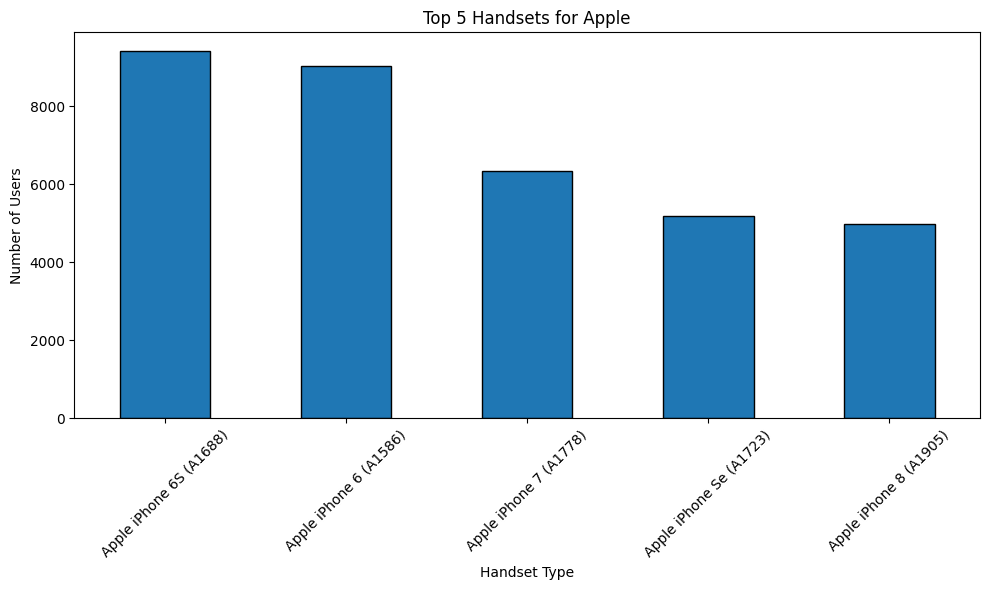

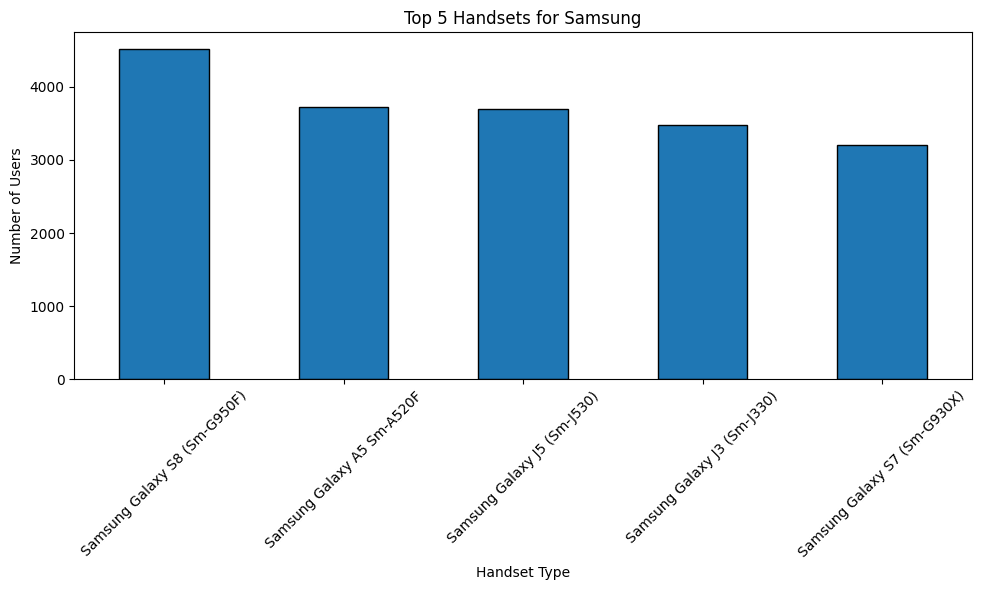

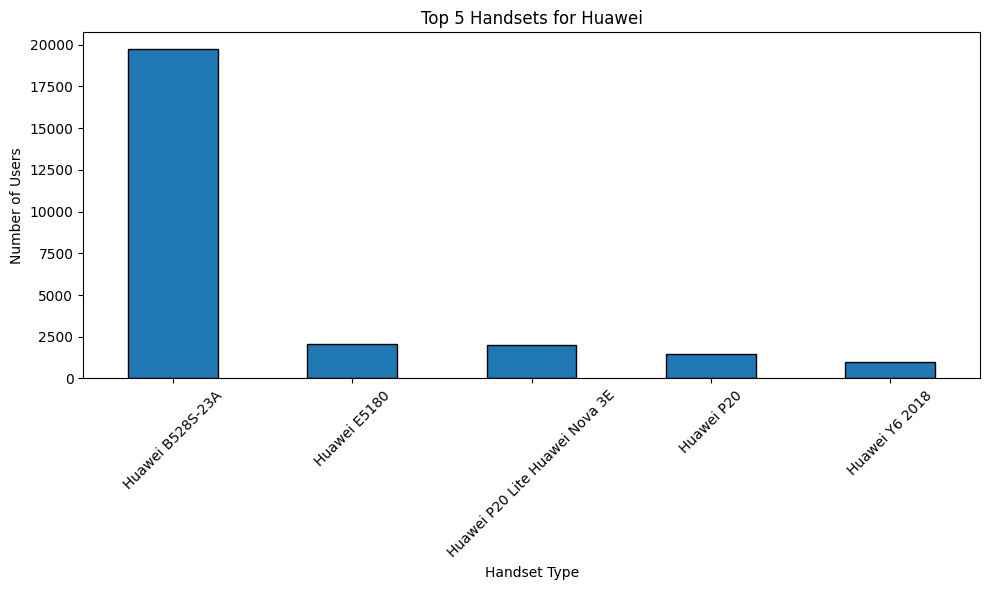

In [24]:
import matplotlib.pyplot as plt
# 3. Plot for Top 5 Handsets per Top 3 Manufacturer
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(10, 6))
    handsets.plot(kind='bar',edgecolor='black')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
# Aggregate the required information per user (MSISDN/Number)
user_overview = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),  # Count unique xDR sessions (assuming 'Bearer Id' represents sessions)
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum of session durations
    total_download_data=('Total DL (Bytes)', 'sum'),  # Total download data
    total_upload_data=('Total UL (Bytes)', 'sum'),  # Total upload data
    total_data_volume_social_media=('Social Media DL (Bytes)', 'sum'),  # Total Social Media download volume
    total_data_volume_google=('Google DL (Bytes)', 'sum'),  # Total Google download volume
    total_data_volume_email=('Email DL (Bytes)', 'sum'),  # Total Email download volume
    total_data_volume_youtube=('Youtube DL (Bytes)', 'sum'),  # Total YouTube download volume
    total_data_volume_netflix=('Netflix DL (Bytes)', 'sum'),  # Total Netflix download volume
    total_data_volume_gaming=('Gaming DL (Bytes)', 'sum'),  # Total Gaming download volume
    total_data_volume_other=('Other DL (Bytes)', 'sum')  # Total Other download volume
).reset_index()

# Display the result
print("User Overview:")
user_overview.head()

User Overview:


,MSISDN/Number,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume_social_media,total_data_volume_google,total_data_volume_email,total_data_volume_youtube,total_data_volume_netflix,total_data_volume_gaming,total_data_volume_other
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,3337123.0,837400.0,14900201.0,10265105.0,8.110911e+08,377096990.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,4197697.0,2828821.0,5324251.0,770569.0,1.050353e+08,279557701.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,3343483.0,2436500.0,2137272.0,16525919.0,5.290685e+08,495086501.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,5937765.0,2178618.0,4393123.0,1157362.0,3.880748e+08,25248001.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,13728668.0,2247808.0,10339971.0,24971647.0,1.308981e+09,777643713.0


In [30]:
# Create a new column for Total Duration
df['Total Duration'] = df['Dur. (ms)']

# Compute total data (DL + UL)
df['Total Data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Segment users into decile classes based on total duration
df['Decile'] = pd.qcut(df['Total Duration'], 5, labels=False)

# Compute the total data per decile class
total_data_per_decile = df.groupby('Decile')['Total Data'].sum().reset_index()

print("Total data per decile class:")
print(total_data_per_decile)


Total data per decile class:
   Decile    Total Data
0     0.0  1.488357e+13
1     1.0  2.362045e+13
2     2.0  6.087404e+12
3     3.0  1.485493e+13
4     4.0  1.491834e+13
